In [1]:
import nibabel as nib
import numpy as np
import time
import argparse
from os.path import join as pjoin

import torch
from T1mra_dataset import T1w2MraDataset
import torchvision.transforms.v2 as v2
from torch.utils.data import DataLoader


In [2]:
num_workers = 10
batch_size = 10
num_batches = 10
data_dir = "/Users/asagilmore/src/t1-mra/data/split/test"

print("Profiling DataLoader performance"
      f" with {num_workers} workers and batch size {batch_size}"
      f" on {num_batches} batches")

test_transform = v2.Compose([
      v2.ToImage(),
      v2.ToDtype(torch.float32),
      v2.RandomApply([v2.RandomRotation(degrees=(90, 90))], p=0.5),
      v2.RandomApply([v2.RandomRotation(degrees=(90, 90))], p=0.5),
      v2.RandomApply([v2.RandomRotation(degrees=(90, 90))], p=0.5),
      v2.RandomHorizontalFlip(p=0.5),
      v2.Normalize(mean=[0.5], std=[0.5])
])

start_time = time.time()
test_dataset = T1w2MraDataset(pjoin(data_dir, "T1W"),
                              pjoin(data_dir, "MRA"),
                              test_transform)
stop_time = time.time()
elapsed_time = stop_time - start_time
print("Time to create Dataset, "
      f"preload into mem: {elapsed_time:.4f} seconds")

print(f'Length of dataset: {len(test_dataset)}')


Profiling DataLoader performance with 10 workers and batch size 10 on 10 batches


100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

Time to create Dataset, preload into mem: 1.5583 seconds
Length of dataset: 300


test first


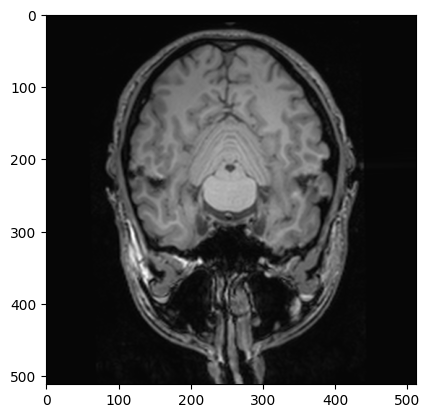

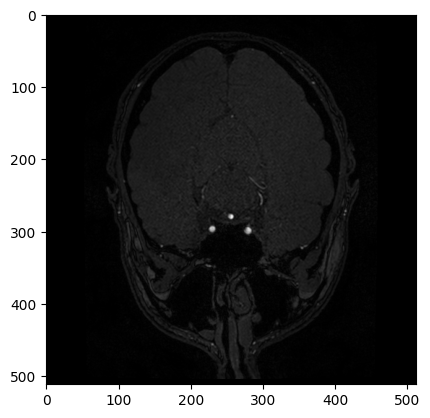

In [40]:
import matplotlib.pyplot as plt
print(f'test first')
start_time = time.time()
out = test_dataset[0]
stop_time = time.time()

squeezed_1 = out[0].squeeze()
squeeze_2 = out[1].squeeze()

plt.imshow(squeezed_1, cmap='gray')
plt.show()
plt.imshow(squeeze_2, cmap='gray')
plt.show()






In [ ]:

elapsed_time = stop_time - start_time
print(f"Time to load first item: {elapsed_time:.4f} seconds")

print(f'test last')
start_time = time.time()
out = test_dataset[-1]
stop_time = time.time()

elapsed_time = stop_time - start_time
print(f"Time to load last item: {elapsed_time:.4f} seconds")

In [16]:

    start_time = time.time()
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size,
                                 num_workers=2, pin_memory=True)
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    print("Time to create DataLoader: "
          f"{elapsed_time:.4f} seconds")

    # warm up
    for i, _ in enumerate(test_dataloader):
        if i >= 5:
            break

    start_time = time.time()
    for i, _ in enumerate(test_dataloader):
        if i >= num_batches:
            break
    end_time = time.time()

    elapsed_time = end_time - start_time
    time_per_batch = elapsed_time / num_batches
    print(f"Time per batch: {time_per_batch:.4f} seconds")
    print(f"Total time for all batches: {elapsed_time:.4f} seconds")



Time to create DataLoader: 0.0003 seconds
Time per batch: 1.2659 seconds
Total time for all batches: 12.6595 seconds
